## Observations and Insights 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how = "outer", on = ('Mouse ID'))
# Display the data table for preview
combined_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_counts = combined_df['Mouse ID'].nunique()
mouse_counts

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_df[combined_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep=False)]
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice = combined_df[combined_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep='first')]
duplicated_mice.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = combined_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = 'first')
clean_df = combined_df[combined_df['Mouse ID'] != 'g989']


In [7]:
# Checking the number of mice in the clean DataFrame.
inner_look = clean_df.iloc[907:922]
inner_look
#mouse_counts_2 = clean_df['Mouse ID'].nunique()
#mouse_counts_2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
907,g867,Stelasyn,Female,9,25,15,51.060419,1
921,h246,Ketapril,Male,13,30,0,45.000000,0
922,h246,Ketapril,Male,13,30,5,49.470417,0
923,h246,Ketapril,Male,13,30,10,51.368862,1
924,h246,Ketapril,Male,13,30,15,56.184327,1
925,h246,Ketapril,Male,13,30,20,57.935912,1
926,h246,Ketapril,Male,13,30,25,59.548854,1
927,h246,Ketapril,Male,13,30,30,63.599610,1
928,h246,Ketapril,Male,13,30,35,67.211270,2
929,h246,Ketapril,Male,13,30,40,71.150835,2


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_variance = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_std = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
grouped_dict = {'Mean Tumor Volume': tumor_mean,
                'Median Tumor Volume': tumor_median,
                'Tumor Volume Variance': tumor_variance,
                'Tumor Volume Std. Dev.': tumor_std,
                'Tumor Volume Std. Err.': tumor_sem}
drug_df = pd.DataFrame(grouped_dict)
drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drug_data = clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
drug_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
#gather the data for the bar plots
mouse_per_drug = clean_df['Drug Regimen'].value_counts()
bar_yaxis = [x for x in mouse_per_drug]
bar_xaxis = clean_df['Drug Regimen'].unique()

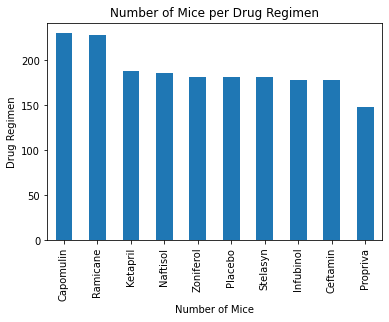

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_per_drug.plot(kind = 'bar')
plt.title('Number of Mice per Drug Regimen')
plt.xlabel('Number of Mice')
plt.ylabel('Drug Regimen')
plt.show()
plt.tight_layout()

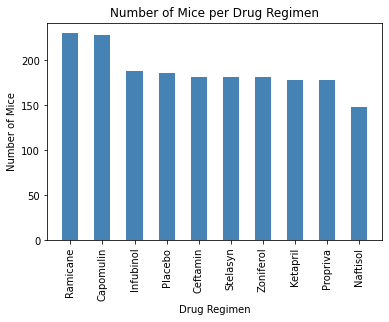

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x = np.arange(len(bar_xaxis))
width = .5

fig, ax = plt.subplots()
ax.bar(x, bar_yaxis, width, color = 'steelblue')
ax.set_title('Number of Mice per Drug Regimen')
ax.set_ylabel('Number of Mice')
ax.set_xlabel('Drug Regimen')
ax.set_xticks(x)
ax.set_xticklabels(bar_xaxis, rotation = 90)


plt.show()
plt.tight_layout()

In [13]:
#get the necessary data
mouse_gender = clean_df['Sex'].value_counts()
mouse_gender_num = [x for x in mouse_gender]
print(mouse_gender_num)
labels = clean_df['Sex'].unique()
print(labels)

[958, 922]
['Male' 'Female']


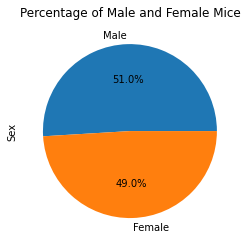

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Percentage of Male and Female Mice')
plt.show()

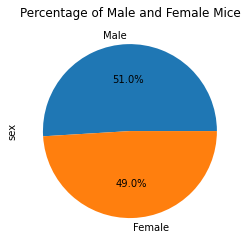

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender_num,
    labels=labels,
    colors=None,
    autopct='%1.1f%%',)
plt.ylabel('sex')
plt.title('Percentage of Male and Female Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatment_df = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') | (clean_df['Drug Regimen'] == 'Ramicane') |
                            (clean_df['Drug Regimen'] == 'Infubinol') | (clean_df['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
greatest_time_point = four_treatment_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume = pd.merge(four_treatment_df, greatest_time_point, how = 'inner', on = 'Mouse ID')
#final_tumor_volume.head(60)

#remove all but the final timepoint
final_tumor_volume = tumor_volume[tumor_volume['Timepoint_x'] == tumor_volume['Timepoint_y']]
#final_tumor_volume_filtered = final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Timepoint_y', 'Tumor Volume (mm3)']]
#final_tumor_volume_sorted
final_tumor_volume = final_tumor_volume.reset_index(drop = True)
final_tumor_volume = final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volume.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_tumor_volume['Drug Regimen'].unique()
#print(treatments)

# Create empty lists to fill with tumor vol data (for plotting)
capomulin_df = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Capomulin']
capomulin_tumor = [x for x in capomulin_df['Tumor Volume (mm3)']]
cap_quartiles = capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
print(cap_quartiles)
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_outliers = [x for x in capomulin_tumor if (x > cap_upperq) | (x < cap_lowerq)]
#print(f'The possible capomulin outliers are {cap_outliers}')

ramicane_df = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Ramicane']
ramicane_tumor = [x for x in ramicane_df['Tumor Volume (mm3)']]
ram_quartiles = ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
print(ram_quartiles)
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_outliers = [x for x in ramicane_tumor if (x > ram_upperq) | (x < ram_lowerq)]
#print(f'The possible ramicane outliers are {ram_outliers}')

infubinol_df = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Infubinol']
infubinol_tumor = [x for x in infubinol_df['Tumor Volume (mm3)']]
inf_quartiles = infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
print(inf_quartiles)
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_outliers = [x for x in infubinol_tumor if (x > inf_upperq) | (x < inf_lowerq)]
#print(inf_outliers)
#print(f'The possible infubinol outliers are {inf_outliers}')

ceftamin_df = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Ceftamin']
ceftamin_tumor = [x for x in ceftamin_df['Tumor Volume (mm3)']]
cef_quartiles = ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
print(cef_quartiles)
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_outliers = [x for x in ceftamin_tumor if (x > cef_upperq) | (x < cef_lowerq)]
#print(cef_outliers)
#print(f'The possible ceftamin outliers are {cef_outliers}')


#for x in final_tumor_volume['Tumor Volume (mm3)']:
   # if final_tumor_volume.index(50):
       # capomulin_tumor.append(final_tumor_volume['Tumor Volume (mm3)'])


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#quartiles = temperatures.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    


0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
